# **Data Bootcamp Midterm Project**
## By Elizabeth Tang and Wonny Min

---
### **Project Description**: Investigating the intersection of coffee quality, consumption, and health.

*   Is there a measurable relationship between average coffee consumption and rates of heart disease, diabetes, or obesity across countries?

*   Do populations with higher coffee consumption show better or worse self-reported health indicators (e.g., energy, sleep quality, mental health sentiment online)?

*   How does caffeine intake relate to average life expectancy or reported well-being metrics?

### **Purpose**

We chose to investigate the intersection of coffee quality, consumption, and health because it connects everyday behavior with global health outcomes in a way that is both data-rich and socially meaningful. Coffee is one of the most widely consumed beverages in the world, yet its effects on health—both positive and negative—remain debated. By combining datasets on national coffee consumption, disease prevalence, and self-reported well-being, we can explore how lifestyle habits reflect and possibly influence population health. This topic allows us to integrate diverse types of data (economic, nutritional, and epidemiological) and apply analytical methods that link consumer behavior with public health indicators. It also provides an opportunity to critically assess how perceptions of caffeine and “healthy energy” evolve across cultures, blending quantitative analysis with human-centered insight.



---



In [ ]:
# install wbgapi (needed once)
!pip install wbgapi

# install PRAW (needed once)
%pip install praw

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from IPython.display import display, HTML
import wbgapi as wb
import praw

import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:
# clone data from github files from Elizabeth (LIZonga)
!git clone -b midterm_data_files https://github.com/LIZonga/data_bootcamp_midterm.git

Cloning into 'data_bootcamp_midterm'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 42 (delta 11), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 2.60 MiB | 3.40 MiB/s, done.
Resolving deltas: 100% (11/11), done.


# **Dataset 1: [Coffee Dataset](https://www.kaggle.com/datasets/michals22/coffee-dataset?resource=download)**

This is a comprehensive Coffee dataset for coffee economic indicatores from the International Coffee Organization dataset in kilo (1000 grams) units. Includes information on:

*   Coffee's domestic consumption ```Coffee_domestic_consumption.csv```
*   Coffee's importer's consumption ```Coffee_importers_consumption.csv```
*   International exports on Coffee ```Coffee_export.csv```
*   International imports on Coffee ```Coffee_import.csv```
*   Coffee production ```Coffee_production.csv```









In [ ]:
# pull the data
C_domestic_consumption_df = pd.read_csv('/content/data_bootcamp_midterm/Coffee_domestic_consumption.csv')

# view the data for Coffee_domestic_consumption
display(C_domestic_consumption_df.head())
display(C_domestic_consumption_df.info())

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000
2,Brazil,Arabica/Robusta,492000000,510000000,534000000,546000000,558000000,606000000,660000000,690000000,...,1183200000,1219800000,1205100000,1219980000,1230480000,1273500000,1319820000,1332000000,1320000000,27824700000
3,Burundi,Arabica/Robusta,120000,96000,102000,114600,120000,120000,120000,120000,...,120000,120000,120000,120000,120000,120000,120000,120000,120000,3412020
4,Ecuador,Arabica/Robusta,21000000,21000000,21000000,21000000,21000000,21000000,18000000,18000000,...,9000000,9000000,9300000,9300000,9300000,9300000,9300000,9300000,8940000,381540000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     55 non-null     object
 1   Coffee type                 55 non-null     object
 2   1990/91                     55 non-null     int64 
 3   1991/92                     55 non-null     int64 
 4   1992/93                     55 non-null     int64 
 5   1993/94                     55 non-null     int64 
 6   1994/95                     55 non-null     int64 
 7   1995/96                     55 non-null     int64 
 8   1996/97                     55 non-null     int64 
 9   1997/98                     55 non-null     int64 
 10  1998/99                     55 non-null     int64 
 11  1999/00                     55 non-null     int64 
 12  2000/01                     55 non-null     int64 
 13  2001/02                     55 non-null     int64 
 

None

In [ ]:
# total consumption per year in kilo (1000 grams) unit
year_columns = C_domestic_consumption_df.columns[2:-1] # taking out 'Country', 'Coffee type', and 'Total_domestic_consumption'
yearly_consumption_df = C_domestic_consumption_df[year_columns].sum()
display(yearly_consumption_df)

,0
1990/91,1170552660
1991/92,1213685820
1992/93,1257087120
1993/94,1265874360
1994/95,1281609960
1995/96,1356154320
1996/97,1410755400
1997/98,1456262399
1998/99,1506995580
1999/00,1544472300


In [ ]:
# top 10 contries with the highest consumption in kilo (1000 grams) unit
top_10_countries = C_domestic_consumption_df.groupby('Country')['Total_domestic_consumption'].sum().sort_values(ascending=False).head(10)
display(top_10_countries)

,Total_domestic_consumption
Country,
Brazil,27824700000
Indonesia,4920480000
Ethiopia,4536540000
Mexico,3189660000
Philippines,2807280000
Colombia,2536776384
Venezuela,2386067999
India,2093460000
Viet Nam,1920928320


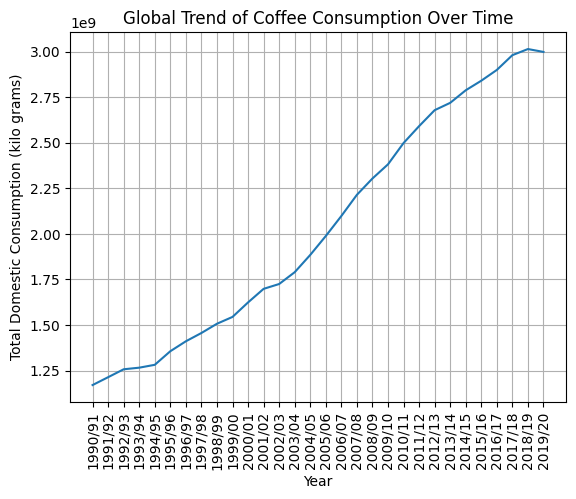

In [ ]:
# global trend of Coffee consumption over time using a grid
plt.plot(yearly_consumption_df.index, yearly_consumption_df)
plt.xlabel('Year')
plt.ylabel('Total Domestic Consumption (kilo grams)')
plt.title('Global Trend of Coffee Consumption Over Time')
plt.xticks(rotation = 90) # rotate x-axis labels by 90 degrees for clearer visuals
plt.grid(True)
plt.show()

In [ ]:
C_production_df = pd.read_csv('/content/data_bootcamp_midterm/Coffee_production.csv')

# view the data for Coffee_domestic_consumption
display(C_production_df.head())
display(C_production_df.info())

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
0,Angola,Robusta/Arabica,3.000000e+06,4.740000e+06,4.680000e+06,1.980000e+06,4.620000e+06,3.720000e+06,4.260000e+06,3.840000e+06,...,1.740000e+06,1.980000e+06,2.100000e+06,2.340000e+06,2.460000e+06,2.700000e+06,2.100000e+06,2.520000e+06,3.120000e+06,8.208000e+07
1,Bolivia (Plurinational State of),Arabica,7.380000e+06,6.240000e+06,7.200000e+06,3.060000e+06,7.020000e+06,8.520000e+06,7.500000e+06,8.460000e+06,...,7.920000e+06,6.300000e+06,7.200000e+06,6.000000e+06,5.040000e+06,4.680000e+06,5.040000e+06,4.980000e+06,4.860000e+06,2.070000e+08
2,Brazil,Arabica/Robusta,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10
3,Burundi,Arabica/Robusta,2.922000e+07,4.002000e+07,3.720000e+07,2.358000e+07,3.984000e+07,2.604000e+07,2.406000e+07,1.500000e+07,...,1.224000e+07,2.436000e+07,9.780000e+06,1.488000e+07,1.614000e+07,1.176000e+07,1.212000e+07,1.224000e+07,1.632000e+07,6.236400e+08
4,Ecuador,Arabica/Robusta,9.024000e+07,1.274400e+08,7.110000e+07,1.241400e+08,1.425600e+08,1.132800e+08,1.195800e+08,7.146000e+07,...,4.950000e+07,4.968000e+07,3.996000e+07,3.864000e+07,3.864000e+07,3.870000e+07,3.744000e+07,2.976000e+07,3.354000e+07,1.900380e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           55 non-null     object 
 1   Coffee type       55 non-null     object 
 2   1990/91           55 non-null     float64
 3   1991/92           55 non-null     float64
 4   1992/93           55 non-null     float64
 5   1993/94           55 non-null     float64
 6   1994/95           55 non-null     float64
 7   1995/96           55 non-null     float64
 8   1996/97           55 non-null     float64
 9   1997/98           55 non-null     float64
 10  1998/99           55 non-null     float64
 11  1999/00           55 non-null     float64
 12  2000/01           55 non-null     float64
 13  2001/02           55 non-null     float64
 14  2002/03           55 non-null     float64
 15  2003/04           55 non-null     float64
 16  2004/05           55 non-null     float64
 17 

None

In [ ]:
# find the global production over time
# use melt() to transform the DataFrame's year columns into rows
production_melted = C_production_df.melt(
    id_vars = ['Country', 'Coffee type', 'Total_production'],
    var_name = 'Year',
    value_name = 'Production'
)

# group by year and sum the Coffee production
global_production = production_melted.groupby('Year')['Production'].sum()
display(global_production)

,Production
Year,
1990/91,5.593800e+09
1991/92,6.076140e+09
1992/93,5.911260e+09
1993/94,5.505540e+09
1994/95,5.598840e+09
1995/96,5.239260e+09
1996/97,6.198660e+09
1997/98,5.993220e+09
1998/99,6.531960e+09


In [ ]:
# find the top 10 Coffee producers lately
top_10_producers = C_production_df.groupby('Country')['Total_production'].sum().sort_values(ascending=False).head(10)
display(top_10_producers)

,Total_production
Country,
Brazil,7.508298e+10
Viet Nam,2.880318e+10
Colombia,2.159862e+10
Indonesia,1.540488e+10
Ethiopia,8.669520e+09
India,8.222220e+09
Mexico,7.853520e+09
Guatemala,7.020540e+09
Honduras,6.672720e+09


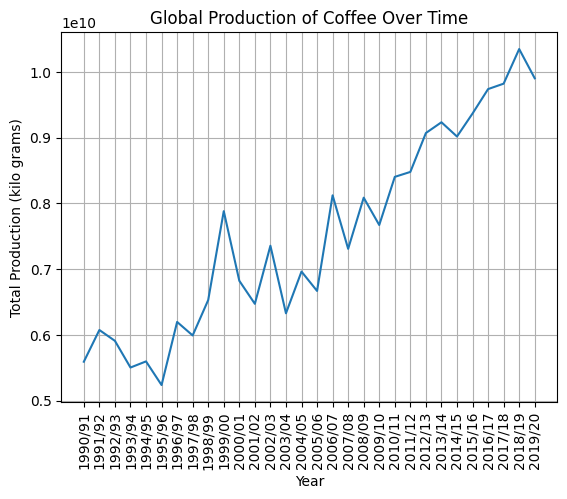

In [ ]:
# graphing the global production of coffee over time
plt.plot(global_production.index, global_production)
plt.xlabel('Year')
plt.ylabel('Total Production (kilo grams)')
plt.title('Global Production of Coffee Over Time')
plt.xticks(rotation = 90) # rotate x-axis labels by 90 degrees for clearer visuals
plt.grid(True)
plt.show()

# **Dataset 2: [Coffee Quality Data (CQI May-2023)](https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi/data)**

This dataset includes data on Coffee quality and sustainability. It provides data on Coffee production and an evaluation on quality (based on aroma, flavor, sweetness, etc. on the Coffee). Data information on:

*   Coffee quality ```Coffee_quality.csv```

In [ ]:
# load the data
C_quality_df = pd.read_csv('/content/data_bootcamp_midterm/Coffee_quality.csv')

# view the data
display(C_quality_df.head())
display(C_quality_df.info())

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

None

In [ ]:
# find the average Coffee quality of each country based on cup points earned from many factors
avg_C_quality = C_quality_df.groupby('Country of Origin')['Total Cup Points'].mean()
display(avg_C_quality)

,Total Cup Points
Country of Origin,
Brazil,81.883000
Colombia,83.877368
Costa Rica,83.740000
El Salvador,81.532857
Ethiopia,84.960909
Guatemala,84.301429
Honduras,83.282308
Indonesia,83.693333
Kenya,83.710000


In [ ]:
# correlation between the different scoring groups
correlation_score = C_quality_df.select_dtypes(include = np.number).corr()
display(correlation_score)

,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
Unnamed: 0,1.000000,1.000000,0.209744,-0.834457,-0.905225,-0.896769,-0.867342,-0.818086,-0.887619,-0.007233,NaN,NaN,-0.918025,NaN,-0.963143,0.046716,0.072819,0.226418,0.282254
ID,1.000000,1.000000,0.209744,-0.834457,-0.905225,-0.896769,-0.867342,-0.818086,-0.887619,-0.007233,NaN,NaN,-0.918025,NaN,-0.963143,0.046716,0.072819,0.226418,0.282254
Number of Bags,0.209744,0.209744,1.000000,-0.227414,-0.264700,-0.304697,-0.204415,-0.040037,-0.259016,0.059370,NaN,NaN,-0.243440,NaN,-0.243753,0.102753,0.043678,0.082271,0.237407
Aroma,-0.834457,-0.834457,-0.227414,1.000000,0.822779,0.793397,0.712920,0.633101,0.745648,-0.028063,NaN,NaN,0.801765,NaN,0.868919,-0.002418,-0.057860,-0.342886,-0.254719
Flavor,-0.905225,-0.905225,-0.264700,0.822779,1.000000,0.876811,0.810934,0.739857,0.851786,-0.039767,NaN,NaN,0.877849,NaN,0.939124,-0.050902,-0.081299,-0.310054,-0.330347
Aftertaste,-0.896769,-0.896769,-0.304697,0.793397,0.876811,1.000000,0.814439,0.738674,0.861951,-0.023926,NaN,NaN,0.865612,NaN,0.934813,-0.051115,-0.107966,-0.303247,-0.330731
Acidity,-0.867342,-0.867342,-0.204415,0.712920,0.810934,0.814439,1.000000,0.765185,0.805236,-0.062564,NaN,NaN,0.840583,NaN,0.897057,-0.016751,-0.110204,-0.209483,-0.262279
Body,-0.818086,-0.818086,-0.040037,0.633101,0.739857,0.738674,0.765185,1.000000,0.816098,-0.043904,NaN,NaN,0.771607,NaN,0.847216,0.009771,0.048256,-0.257465,-0.208784
Balance,-0.887619,-0.887619,-0.259016,0.745648,0.851786,0.861951,0.805236,0.816098,1.000000,-0.089064,NaN,NaN,0.884467,NaN,0.929520,-0.072660,0.039552,-0.315502,-0.317733
Uniformity,-0.007233,-0.007233,0.059370,-0.028063,-0.039767,-0.023926,-0.062564,-0.043904,-0.089064,1.000000,NaN,NaN,-0.074602,NaN,0.003556,0.035240,0.021471,0.038486,0.071714


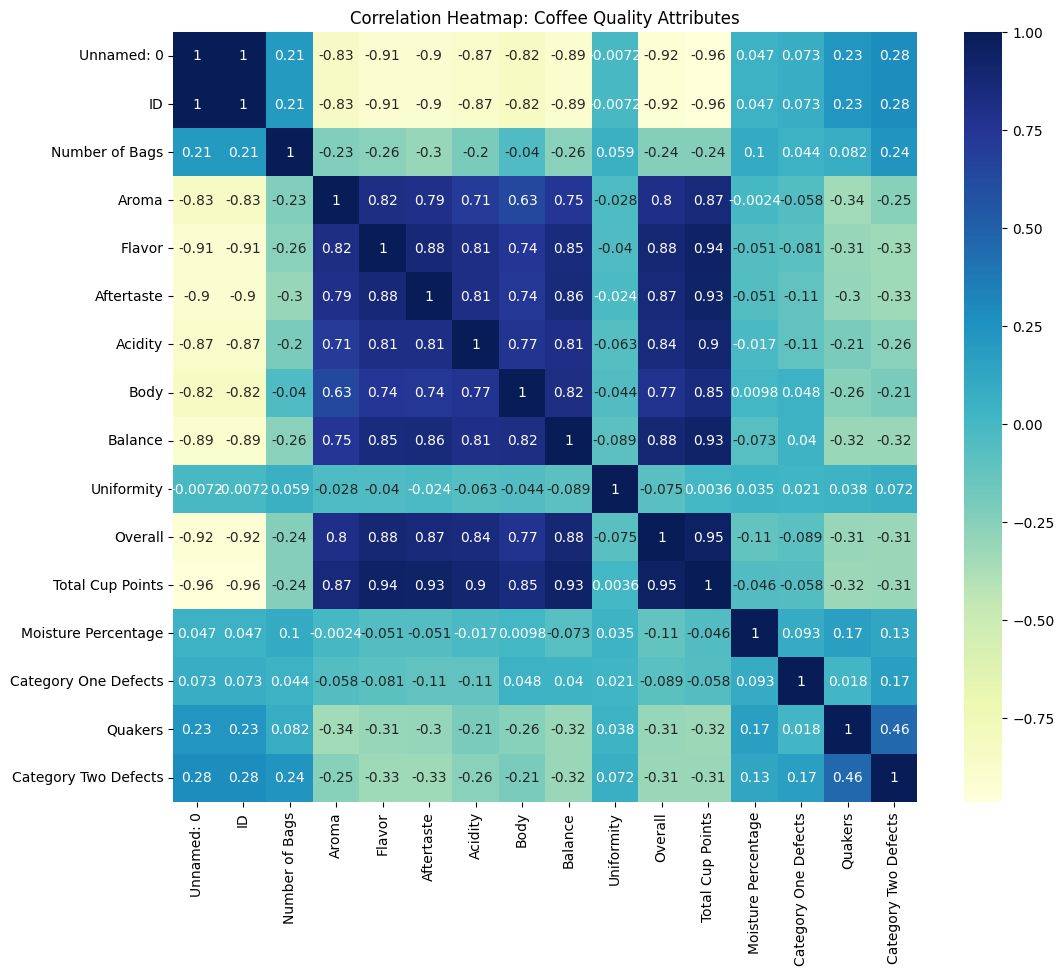

In [ ]:
# remove columns with NaN correlation values for a clean heatmap
correlation_score_cleaned = correlation_score.dropna(axis = 1, how = 'all').dropna(axis = 0, how = 'all')

# create a heatmap of the coffee quality attributes
# darker color = higher correlation, lighter color = lower correlation
plt.figure(figsize = (12, 10))
sns.heatmap(correlation_score_cleaned, annot = True, cmap = 'YlGnBu')
plt.title('Correlation Heatmap: Coffee Quality Attributes')
plt.show()

# **Dataset 3: [Comprehensive Analysis of Coffee Health Correlation](https://www.kaggle.com/code/muhammedaliyilmazz/comprehensive-analysis-of-coffee-health-correlatio/input)**

This dataset includes data on individual records and people correlating their coffee/caffeine habits with health-related symptoms in their life like on sleep. This is across multiple countries. Data information on:

*   How Coffee affects health ```Coffee_and_health.csv```

In [ ]:
# load the data
C_health_df = pd.read_csv('/content/data_bootcamp_midterm/Coffee_and_health.csv')

# view the data
display(C_health_df.head())
display(C_health_df.info())

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

None

In [ ]:
# average cups of Coffee per day by country
avg_cups_coffee = C_health_df.groupby('Country')['Coffee_Intake'].mean()
display(avg_cups_coffee)

,Coffee_Intake
Country,
Australia,2.544266
Belgium,2.411670
Brazil,2.547588
Canada,2.497606
China,2.574664
Finland,2.477843
France,2.528457
Germany,2.466398
India,2.503435


In [ ]:
# Map stress levels to numerical values
stress_level_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
C_health_df['Stress_Level_Numeric'] = C_health_df['Stress_Level'].map(stress_level_mapping)

display(C_health_df.head())

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption,Stress_Level_Numeric
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0,1
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1,1


# **Dataset 4: [World Health Organization Data for Health Indicators](https://www.who.int/data/gho/data/indicators)**

This dataset includes data by the World Health Organization who works to analyze health statistics. Data information on:

*   Overweight among adults, BMI >= 25, age-standardized estimate (%) ```Overweight_BMI_data.csv```
*   Hypertension among adults aged 30-79 years (%) ```Hypertension_data.csv```
*   Diabetes, prevalence (%) ```Diabetes_data.csv```



In [ ]:
# load the data for overweight
overweight_df = pd.read_csv('/content/data_bootcamp_midterm/Overweight_BMI_data.csv')

# view the data
display(overweight_df.head())
display(overweight_df.info())

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,ETH,Ethiopia,Year,2022,...,NaN,NaN,9.10,NaN,12.82,10.9 [9.1-12.8],NaN,NaN,EN,2024-02-29 00:00:00
1,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,RWA,Rwanda,Year,2022,...,NaN,NaN,9.26,NaN,13.87,11.5 [9.3-13.9],NaN,NaN,EN,2024-02-29 00:00:00
2,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,SEAR,South-East Asia,Country,TLS,Timor-Leste,Year,2022,...,NaN,NaN,8.45,NaN,15.05,11.6 [8.5-15.0],NaN,NaN,EN,2024-02-29 00:00:00
3,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,BDI,Burundi,Year,2022,...,NaN,NaN,9.01,NaN,15.12,11.8 [9.0-15.1],NaN,NaN,EN,2024-02-29 00:00:00
4,NCD_BMI_25A,"Prevalence of overweight among adults, BMI &Gr...",numeric,AFR,Africa,Country,SLE,Sierra Leone,Year,2022,...,NaN,NaN,10.47,NaN,16.22,13.3 [10.5-16.2],NaN,NaN,EN,2024-02-29 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19701 entries, 0 to 19700
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               19701 non-null  object 
 1   Indicator                   19701 non-null  object 
 2   ValueType                   19701 non-null  object 
 3   ParentLocationCode          19701 non-null  object 
 4   ParentLocation              19701 non-null  object 
 5   Location type               19701 non-null  object 
 6   SpatialDimValueCode         19701 non-null  object 
 7   Location                    19701 non-null  object 
 8   Period type                 19701 non-null  object 
 9   Period                      19701 non-null  int64  
 10  IsLatestYear                19701 non-null  bool   
 11  Dim1 type                   19701 non-null  object 
 12  Dim1                        19701 non-null  object 
 13  Dim1ValueCode               197

None

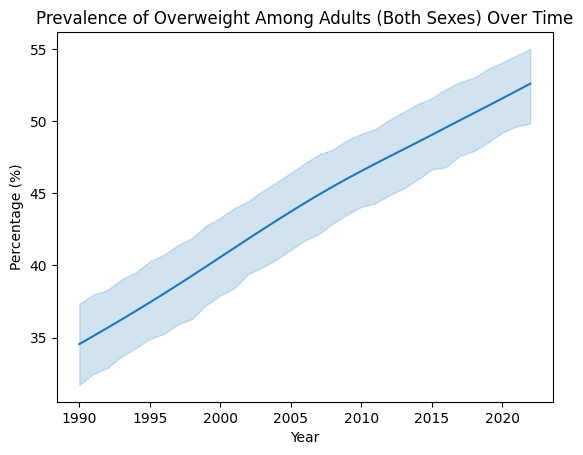

In [ ]:
# find data for men and women in 'Both sexes'
overweight_both_sexes = overweight_df[overweight_df['Dim1'] == 'Both sexes']

# graph how overweight in percentage over time for both men and women
sns.lineplot(x = 'Period', y = 'FactValueNumeric', data = overweight_both_sexes)
plt.title('Prevalence of Overweight Among Adults Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
# load the data for hypertension
hypertension_df = pd.read_csv('/content/data_bootcamp_midterm/Hypertension_data.csv')

# view the data
display(hypertension_df.head())
display(hypertension_df.info())

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_HYP_PREVALENCE_A,"Hypertension among adults aged 30-79 years, pr...",numeric,AFR,Africa,Country,AGO,Angola,Year,2019,...,NaN,NaN,28.7,NaN,49.5,38.7 [28.7-49.5],NaN,NaN,EN,2021-08-20 00:00:00
1,NCD_HYP_PREVALENCE_A,"Hypertension among adults aged 30-79 years, pr...",numeric,AFR,Africa,Country,AGO,Angola,Year,2019,...,NaN,NaN,22.4,NaN,51.7,36.5 [22.4-51.7],NaN,NaN,EN,2021-08-20 00:00:00
2,NCD_HYP_PREVALENCE_A,"Hypertension among adults aged 30-79 years, pr...",numeric,AFR,Africa,Country,AGO,Angola,Year,2019,...,NaN,NaN,27.2,NaN,56.1,40.8 [27.2-56.1],NaN,NaN,EN,2021-08-20 00:00:00
3,NCD_HYP_PREVALENCE_A,"Hypertension among adults aged 30-79 years, pr...",numeric,AFR,Africa,Country,AGO,Angola,Year,2018,...,NaN,NaN,29.4,NaN,48.8,38.8 [29.4-48.8],NaN,NaN,EN,2021-08-20 00:00:00
4,NCD_HYP_PREVALENCE_A,"Hypertension among adults aged 30-79 years, pr...",numeric,AFR,Africa,Country,AGO,Angola,Year,2018,...,NaN,NaN,23.1,NaN,51.2,36.7 [23.1-51.2],NaN,NaN,EN,2021-08-20 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               30000 non-null  object 
 1   Indicator                   30000 non-null  object 
 2   ValueType                   30000 non-null  object 
 3   ParentLocationCode          30000 non-null  object 
 4   ParentLocation              30000 non-null  object 
 5   Location type               30000 non-null  object 
 6   SpatialDimValueCode         30000 non-null  object 
 7   Location                    30000 non-null  object 
 8   Period type                 30000 non-null  object 
 9   Period                      30000 non-null  int64  
 10  IsLatestYear                30000 non-null  bool   
 11  Dim1 type                   30000 non-null  object 
 12  Dim1                        30000 non-null  object 
 13  Dim1ValueCode               300

None

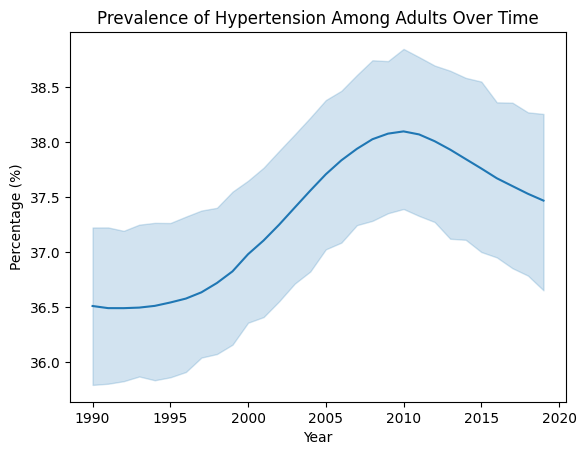

In [ ]:
# find data for both mena nd women in 'Both sexes'
hypertension_both_sexes = hypertension_df[hypertension_df['Dim1'] == 'Both sexes']

# graph hypertension prevalence over time
sns.lineplot(x = 'Period', y = 'FactValueNumeric', data = hypertension_both_sexes)
plt.title('Prevalence of Hypertension Among Adults Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
# load the data for diabetes
diabetes_df = pd.read_csv('/content/data_bootcamp_midterm/Diabetes_data.csv')

# view the data
display(diabetes_df.head())
display(diabetes_df.info())

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_DIABETES_PREVALENCE_AGESTD,"Prevalence of diabetes, age-standardized",numeric,AFR,Africa,Country,AGO,Angola,Year,2022,...,NaN,NaN,9.37,NaN,29.56,18.4 [9.4-29.6],NaN,NaN,EN,2024-11-13 00:00:00
1,NCD_DIABETES_PREVALENCE_AGESTD,"Prevalence of diabetes, age-standardized",numeric,AFR,Africa,Country,AGO,Angola,Year,2022,...,NaN,NaN,11.37,NaN,33.98,21.6 [11.4-34.0],NaN,NaN,EN,2024-11-13 00:00:00
2,NCD_DIABETES_PREVALENCE_AGESTD,"Prevalence of diabetes, age-standardized",numeric,AFR,Africa,Country,AGO,Angola,Year,2022,...,NaN,NaN,7.24,NaN,36.08,19.1 [7.2-36.1],NaN,NaN,EN,2024-11-13 00:00:00
3,NCD_DIABETES_PREVALENCE_AGESTD,"Prevalence of diabetes, age-standardized",numeric,AFR,Africa,Country,AGO,Angola,Year,2022,...,NaN,NaN,8.80,NaN,40.60,22.2 [8.8-40.6],NaN,NaN,EN,2024-11-13 00:00:00
4,NCD_DIABETES_PREVALENCE_AGESTD,"Prevalence of diabetes, age-standardized",numeric,AFR,Africa,Country,AGO,Angola,Year,2022,...,NaN,NaN,6.27,NaN,35.04,17.7 [6.3-35.0],NaN,NaN,EN,2024-11-13 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               30000 non-null  object 
 1   Indicator                   30000 non-null  object 
 2   ValueType                   30000 non-null  object 
 3   ParentLocationCode          30000 non-null  object 
 4   ParentLocation              30000 non-null  object 
 5   Location type               30000 non-null  object 
 6   SpatialDimValueCode         30000 non-null  object 
 7   Location                    30000 non-null  object 
 8   Period type                 30000 non-null  object 
 9   Period                      30000 non-null  int64  
 10  IsLatestYear                30000 non-null  bool   
 11  Dim1 type                   30000 non-null  object 
 12  Dim1                        30000 non-null  object 
 13  Dim1ValueCode               300

None

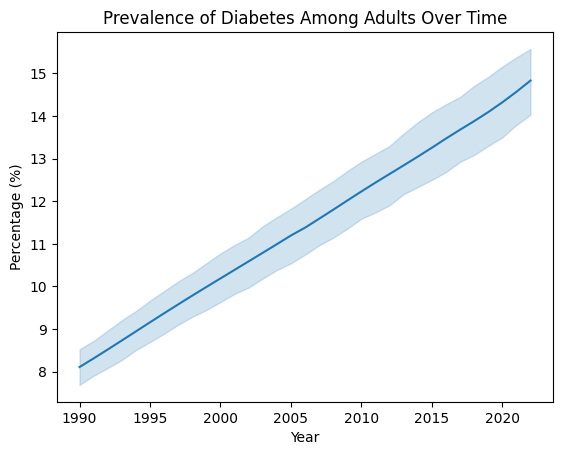

In [ ]:
# find data for both mena nd women in 'Both sexes'
diabetes_both_sexes = diabetes_df[diabetes_df['Dim1'] == 'Both sexes']

# graph diabetes prevalence over time
sns.lineplot(x = 'Period', y = 'FactValueNumeric', data = diabetes_both_sexes)
plt.title('Prevalence of Diabetes Among Adults Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.show()



---
# **Analysis Questions**


**Question 1**: Does average coffee consumption per capita correlate with heart disease mortality rate across countries?

In [ ]:
##Data needed: ICO or FAOSTAT (coffee consumption), WHO GHO (heart disease).
##Coding: Use pandas merge by country; run scipy.stats.pearsonr() or sns.regplot().

**Question 2**: How does coffee consumption relate to diabetes prevalence and obesity rates globally?

In [ ]:
##Data needed: WHO GHO or OWID health datasets.
##Coding: Multiple regression (statsmodels or sklearn.LinearRegression).

**Question 3**: Is there a significant difference in life expectancy between countries in the top 25% vs bottom 25% of coffee consumers?

In [ ]:
##Quantile segmentation with pandas.qcut() and t-test comparison using scipy.stats.ttest_ind().

**Question 4**: Is there an optimal range of caffeine intake associated with higher self-reported well-being scores?

In [ ]:
##Data needed: OECD Better Life Index + caffeine data from USDA/OpenFoodFacts.
##Coding: Nonlinear regression (polynomial fit) or scatter plot trendline.

**Question 5**: How does coffee consumption affect sleep duration or quality across countries?



In [ ]:
##Data needed: Sleep datasets (Kaggle or OECD).
##Coding: Correlation matrix + heatmap (sns.heatmap()).

**Question 6**: Do regions with higher coffee consumption show lower mental health distress or higher happiness index scores?

In [ ]:
##Data needed: World Happiness Report + ICO consumption.
##Coding: Pairwise correlations, multiple linear regression.

**Question 7**: How has coffee consumption per capita changed over the last 30 years in high-income vs low-income countries?

In [ ]:
##Data needed: ICO or FAOSTAT time series, World Bank income classification.
##Coding: Grouped line plots or rolling averages.

**Question 8**: What countries have seen the largest increase or decrease in coffee consumption from 2000–2020, and how does this align with changes in obesity rates?

In [ ]:
#Coding: Compute percentage change per country, use pandas.merge() and sns.barplot().